In [3]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
def eucldist(p0,p1):
    dist = 0.0
    for i in range(0,len(p0)):
        dist += (p0[i] - p1[i])**2
    return math.sqrt(dist)

In [7]:
def kmeans(k,datapoints):

    d = len(datapoints[0])
    max_iterations = 1000
    i = 0
   
    cluster = [0] * len(datapoints)

    prev_cluster = [-1] * len(datapoints)
    
    cluster_centers = []
    for i in range(0,k):
        new_cluster = []
        
        cluster_centers += [random.choice(datapoints)]
                
        force_k_clusters = False
    
    while(cluster != prev_cluster) or (i > max_iterations) or (force_k_clusters) :
        
        prev_cluster = list(cluster)
        force_k_clusters = False
        i += 1
    
        for p in range(0,len(datapoints)):
            min_dist = float("inf")
            
            for c in range(0,len(cluster_centers)):
                
                dist = eucldist(datapoints[p],cluster_centers[c])
                
                if (dist < min_dist):
                    min_dist = dist  
                    cluster[p] = c   
        for k in range(0,len(cluster_centers)):
            new_center = [0] * d
            members = 0
            for p in range(0,len(datapoints)):
                if (cluster[p] == k): 
                    for j in range(0,d):
                        new_center[j] += datapoints[p][j]
                    members += 1
            
            for j in range(0,d):
                if members != 0:
                    new_center[j] = new_center[j] / float(members) 
                
                else: 
                    new_center = random.choice(datapoints)
                    force_k_clusters = True
                    print ("Forced Recalculation")
                    
            
            cluster_centers[k] = new_center
            
    dp = pd.DataFrame(datapoints)
    #print(dp)
    plt.scatter(dp[0],dp[1])        
    df = pd.DataFrame(cluster_centers)
    plt.scatter(df[0],df[1])
    
    plt.show()

    print("Clusters", cluster_centers)
    print("Iterations",i)
    print("Assignments", cluster)

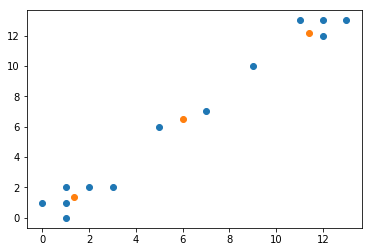

Clusters [[1.3333333333333333, 1.3333333333333333], [11.4, 12.2], [6.0, 6.5]]
Iterations 7
Assignments [0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1]


In [8]:
datapoints = [(3,2),(2,2),(1,2),(0,1),(1,0),(1,1),(5,6),(7,7),(9,10),(11,13),(12,12),(12,13),(13,13)]
k = 3 
      
kmeans(k,datapoints)